In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df = pd.read_csv("data/mushrooms.csv")
df.shape

(8124, 23)

In [9]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [10]:
for feature in df.columns:
    print(feature, ':', df[feature].unique())

class : ['p' 'e']
cap-shape : ['x' 'b' 's' 'f' 'k' 'c']
cap-surface : ['s' 'y' 'f' 'g']
cap-color : ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises : ['t' 'f']
odor : ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment : ['f' 'a']
gill-spacing : ['c' 'w']
gill-size : ['n' 'b']
gill-color : ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape : ['e' 't']
stalk-root : ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring : ['s' 'f' 'k' 'y']
stalk-surface-below-ring : ['s' 'f' 'y' 'k']
stalk-color-above-ring : ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring : ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type : ['p']
veil-color : ['w' 'n' 'o' 'y']
ring-number : ['o' 't' 'n']
ring-type : ['p' 'e' 'l' 'f' 'n']
spore-print-color : ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population : ['s' 'n' 'a' 'v' 'y' 'c']
habitat : ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [11]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

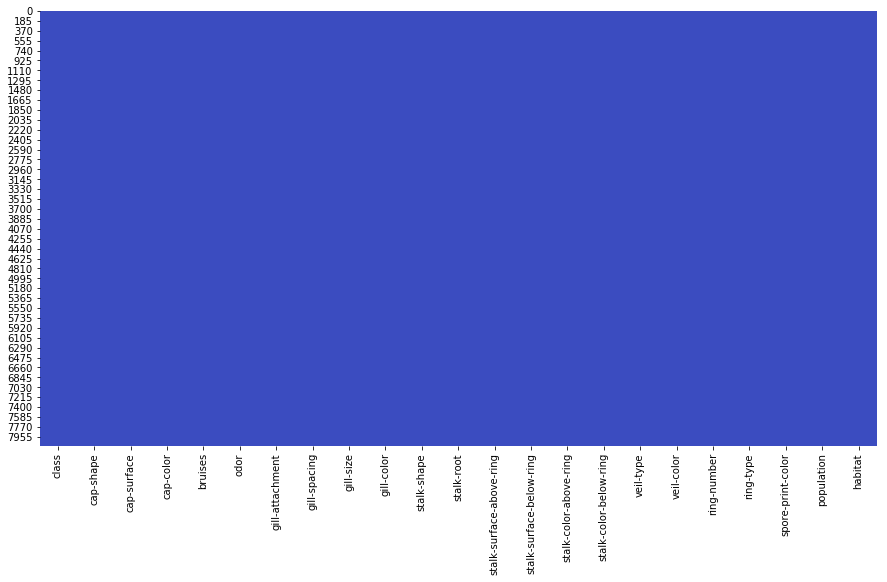

In [6]:
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull(),cmap='coolwarm',cbar = False)

In [7]:
df["class"].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [6]:
for feature in df.columns:
    print(feature, ':', df[feature].unique())

class : [1 0]
cap-shape : [5 0 4 2 3 1]
cap-surface : [2 3 0 1]
cap-color : [4 9 8 3 2 5 0 7 1 6]
bruises : [1 0]
odor : [6 0 3 5 2 1 8 7 4]
gill-attachment : [1 0]
gill-spacing : [0 1]
gill-size : [1 0]
gill-color : [ 4  5  2  7 10  3  9  1  0  8 11  6]
stalk-shape : [0 1]
stalk-root : [3 2 1 4 0]
stalk-surface-above-ring : [2 0 1 3]
stalk-surface-below-ring : [2 0 3 1]
stalk-color-above-ring : [7 3 6 4 0 2 5 1 8]
stalk-color-below-ring : [7 6 3 0 4 2 8 5 1]
veil-type : [0]
veil-color : [2 0 1 3]
ring-number : [1 2 0]
ring-type : [4 0 2 1 3]
spore-print-color : [2 3 6 1 7 5 4 8 0]
population : [3 2 0 4 5 1]
habitat : [5 1 3 0 4 6 2]


In [4]:
labelencoder=LabelEncoder()
for col in df.columns:
    df[col] = labelencoder.fit_transform(df[col])

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [9]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
class,8124.0,0.482029,0.499708,0.0,0.0,0.0,1.0,1.0
cap-shape,8124.0,3.348104,1.604329,0.0,2.0,3.0,5.0,5.0
cap-surface,8124.0,1.827671,1.229873,0.0,0.0,2.0,3.0,3.0
cap-color,8124.0,4.504677,2.545821,0.0,3.0,4.0,8.0,9.0
bruises,8124.0,0.415559,0.492848,0.0,0.0,0.0,1.0,1.0
odor,8124.0,4.144756,2.103729,0.0,2.0,5.0,5.0,8.0
gill-attachment,8124.0,0.974151,0.158695,0.0,1.0,1.0,1.0,1.0
gill-spacing,8124.0,0.161497,0.368011,0.0,0.0,0.0,0.0,1.0
gill-size,8124.0,0.309207,0.462195,0.0,0.0,0.0,1.0,1.0
gill-color,8124.0,4.810684,3.540359,0.0,2.0,5.0,7.0,11.0


[Text(0,0.5,'No of unique elements'),
 Text(0.5,0,'Features'),
 Text(0.5,1,'Unique elements per column')]

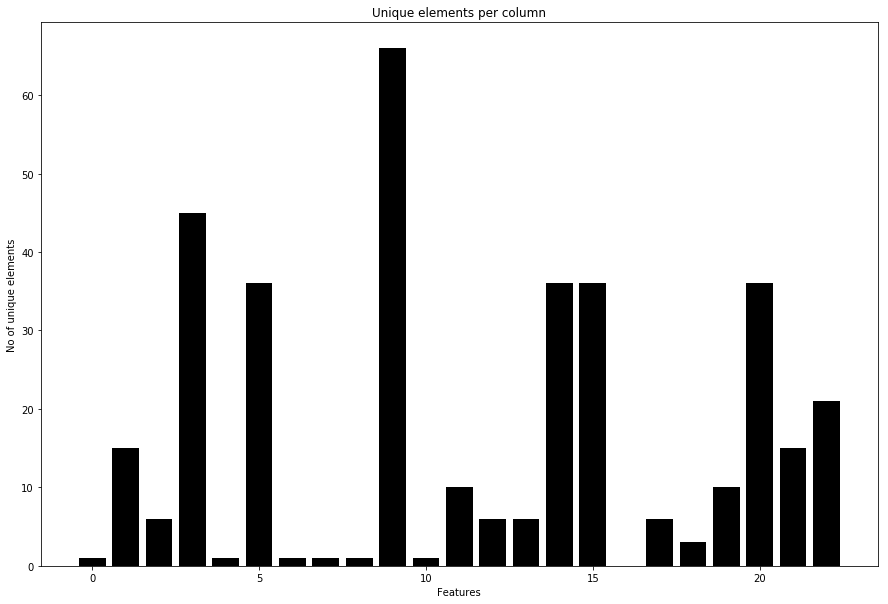

In [5]:
count_var=[]
for col in df.columns:
    count_var.append(df[col].unique().sum())
size=np.arange(len(count_var))
fig=plt.figure(figsize = (15,10))
ax=fig.add_subplot(1,1,1)
ax.bar(size,count_var, color = 'k')
ax.set(title="Unique elements per column",
      ylabel='No of unique elements',
      xlabel='Features')

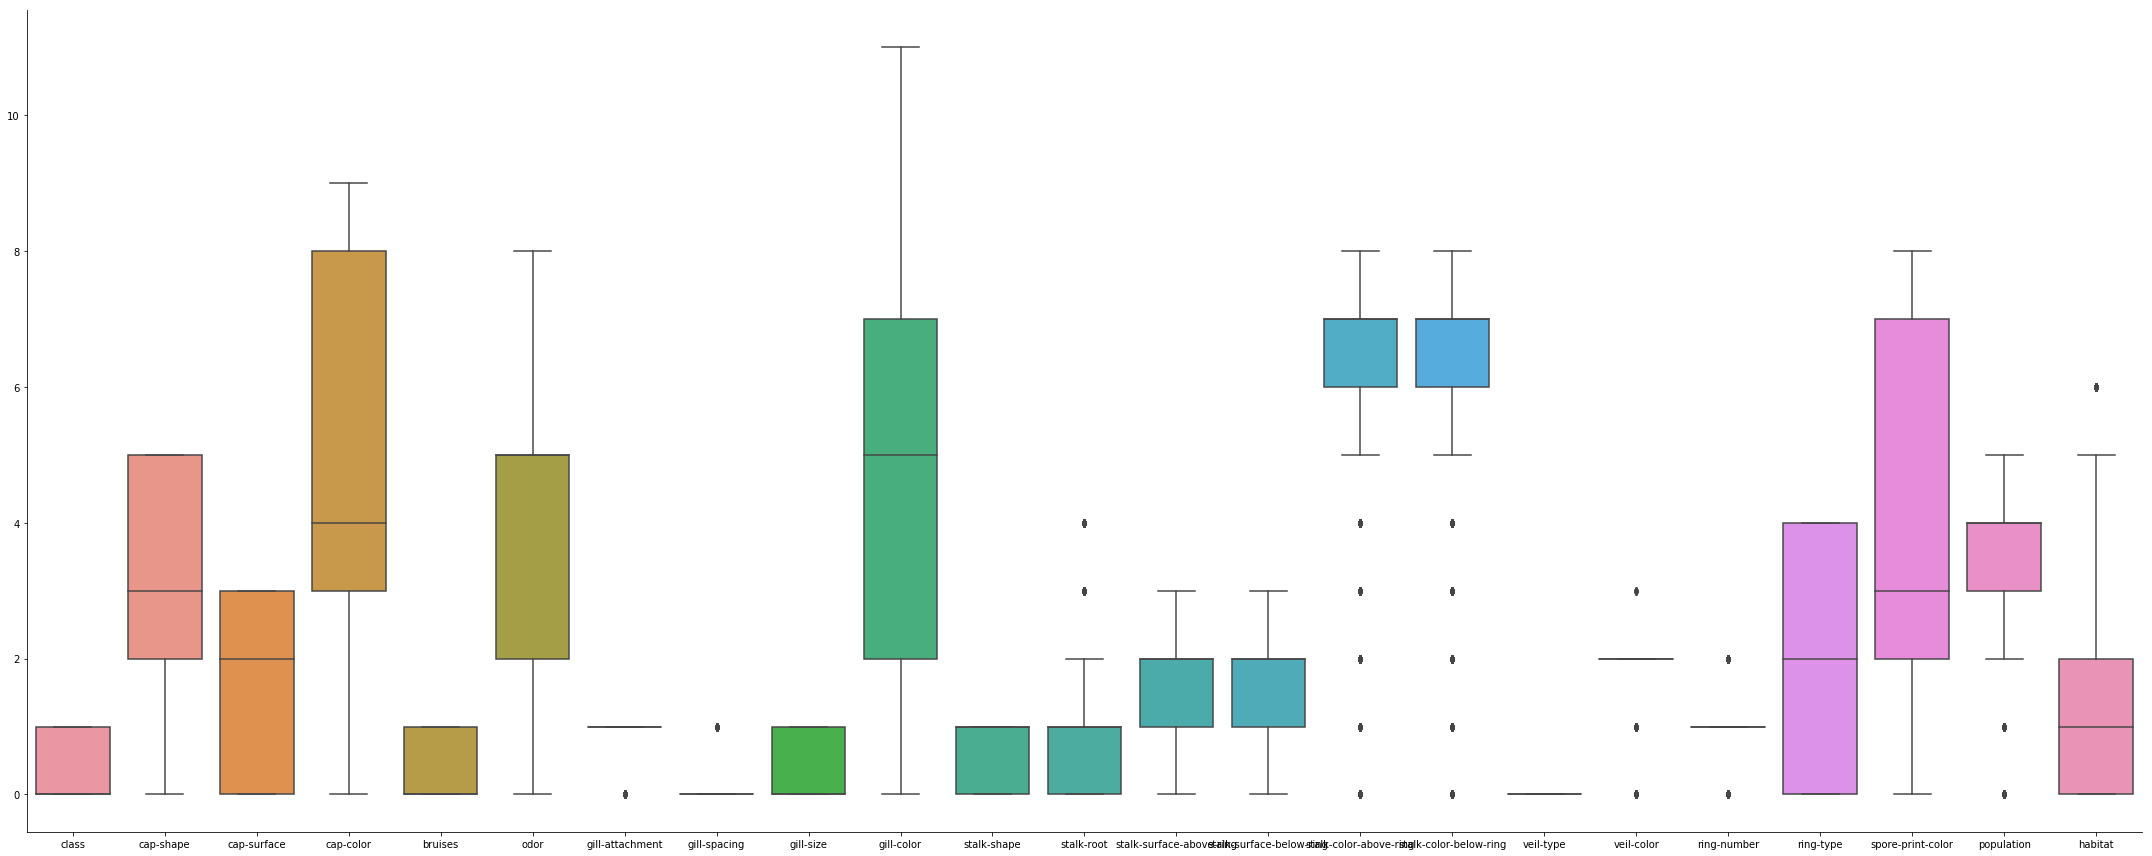

In [14]:
sns.factorplot(data=df,kind='box',size=12,aspect=2.5)

In [15]:
df.groupby(by='class').count().T

class,0,1
cap-shape,4208,3916
cap-surface,4208,3916
cap-color,4208,3916
bruises,4208,3916
odor,4208,3916
gill-attachment,4208,3916
gill-spacing,4208,3916
gill-size,4208,3916
gill-color,4208,3916
stalk-shape,4208,3916


In [16]:
np.sum(df.duplicated())

0

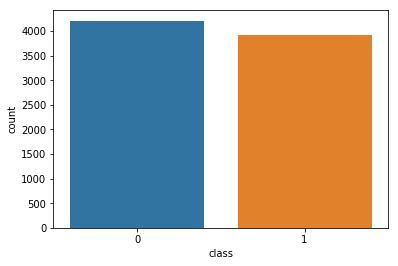

In [17]:
sns.countplot(df["class"])

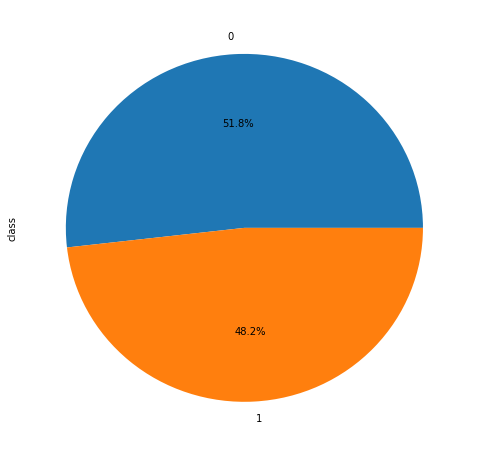

In [18]:
plt.figure(1, figsize=(8,8))
df["class"].value_counts().plot.pie(autopct="%1.1f%%")

[4040, 1712, 1248, 400, 384, 340]


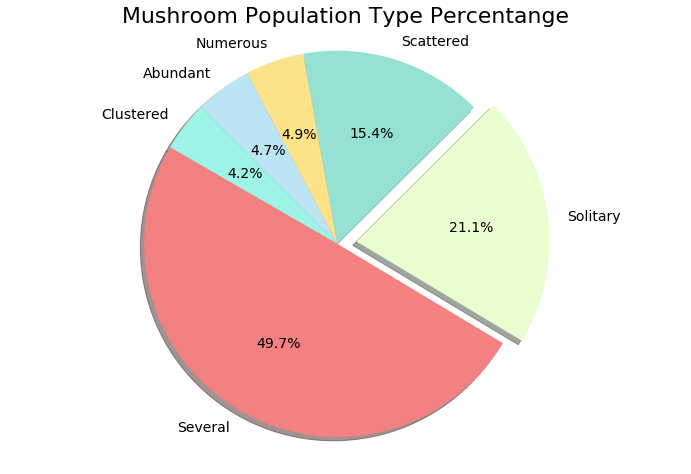

In [20]:
populations = df['population'].value_counts()
pop_size = populations.values.tolist() #Provides numerical values
pop_types = populations.axes[0].tolist() #Converts index labels object to list
print(pop_size)
# Data to plot
pop_labels = 'Several', 'Solitary', 'Scattered', 'Numerous', 'Abundant', 'Clustered'
colors = ['#F38181','#EAFFD0','#95E1D3','#FCE38A','#BDE4F4','#9EF4E6']
explode = (0, 0.1, 0, 0, 0, 0)  # explode 1st slice
fig = plt.figure(figsize=(12,8))
# Plot
plt.title('Mushroom Population Type Percentange', fontsize=22)
patches, texts, autotexts = plt.pie(pop_size, explode=explode, labels=pop_labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=150)
for text,autotext in zip(texts,autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)

plt.axis('equal')
plt.show()

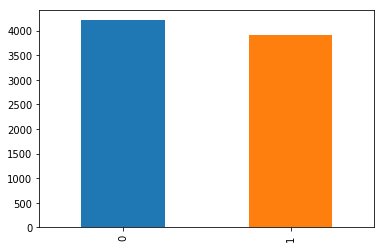

In [19]:
df["class"].value_counts().plot(kind='bar')

In [20]:
df["class"].value_counts(sort=True, normalize=True)
df["class"].value_counts()*100/len(df)

0    51.797144
1    48.202856
Name: class, dtype: float64

0    3148
1    2148
4    1144
2     832
5     368
3     292
6     192
Name: habitat, dtype: int64


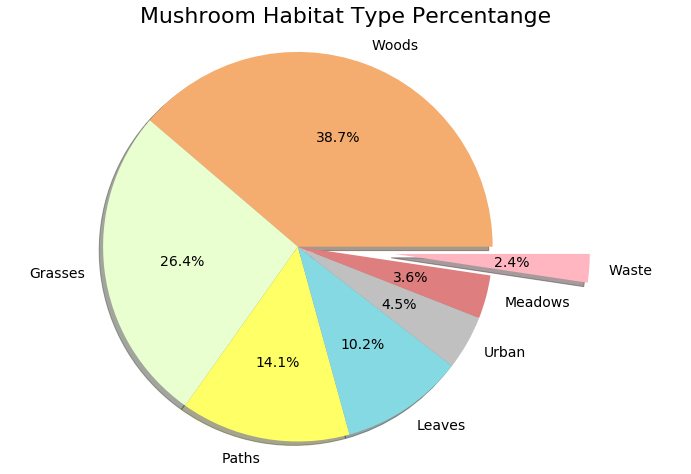

In [23]:
habitats = df['habitat'].value_counts()
hab_size = habitats.values.tolist() #Provides numerical values
hab_types = habitats.axes[0].tolist() #Converts index labels object to list
print(habitats)
# Data to plot
hab_labels = 'Woods', 'Grasses', 'Paths', 'Leaves', 'Urban', 'Meadows', 'Waste'
colors = ['#F5AD6F','#EAFFD0','#FFFF66','#84D9E2','#C0C0C0','#DE7E7E', '#FFB6C1']
explode = (0, 0, 0, 0, 0, 0,0.5)  # explode 1st slice
fig = plt.figure(figsize=(12,8))
# Plot
plt.title('Mushroom Habitat Type Percentange', fontsize=22)
patches, texts, autotexts = plt.pie(hab_size, explode=explode, labels=hab_labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=360)
for text,autotext in zip(texts,autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)

plt.axis('equal')
plt.show()

In [21]:
df.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


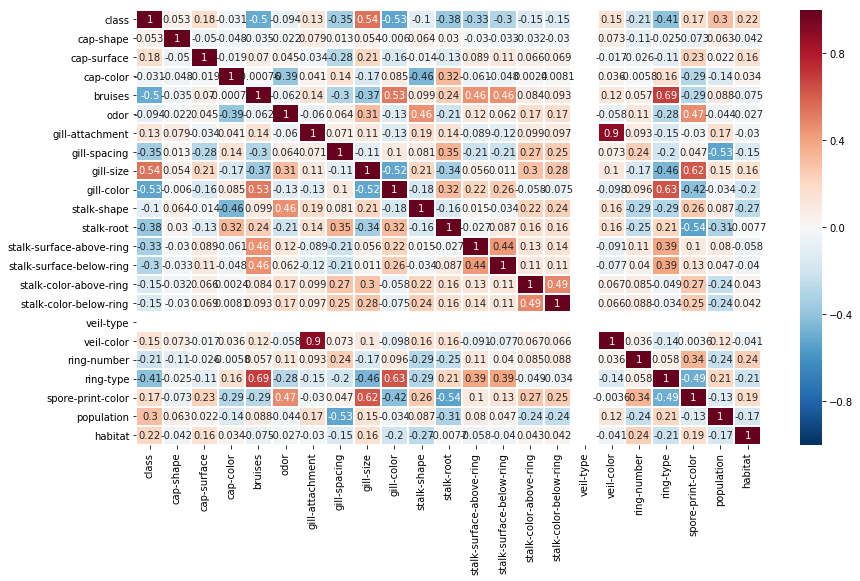

In [24]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot=True, linewidths=1,  vmin=-1, cmap="RdBu_r")

In [25]:
correlation = df.corr()
correlation['class'].sort_values(ascending=False)

class                       1.000000
gill-size                   0.540024
population                  0.298686
habitat                     0.217179
cap-surface                 0.178446
spore-print-color           0.171961
veil-color                  0.145142
gill-attachment             0.129200
cap-shape                   0.052951
cap-color                  -0.031384
odor                       -0.093552
stalk-shape                -0.102019
stalk-color-below-ring     -0.146730
stalk-color-above-ring     -0.154003
ring-number                -0.214366
stalk-surface-below-ring   -0.298801
stalk-surface-above-ring   -0.334593
gill-spacing               -0.348387
stalk-root                 -0.379361
ring-type                  -0.411771
bruises                    -0.501530
gill-color                 -0.530566
veil-type                        NaN
Name: class, dtype: float64

## Usually the least correlating variable is the most important one for classification.

## In this case, "gill-color" has -0.53 so let's look at it closely:

In [11]:
labelencoder=LabelEncoder()
for col in df.columns:
    df[col] = labelencoder.fit_transform(df[col])

df[['class', 'gill-color']].groupby(['gill-color'], as_index=False).mean().sort_values(by='class', ascending=False)

,gill-color,class
0,0,1.000000
8,8,1.000000
3,3,0.721311
2,2,0.670213
7,7,0.428954
11,11,0.255814
10,10,0.204659
4,4,0.156863
5,5,0.106870
9,9,0.097561


In [27]:
df.corr()['class'].abs().sort_values(ascending= False)

class                       1.000000
gill-size                   0.540024
gill-color                  0.530566
bruises                     0.501530
ring-type                   0.411771
stalk-root                  0.379361
gill-spacing                0.348387
stalk-surface-above-ring    0.334593
stalk-surface-below-ring    0.298801
population                  0.298686
habitat                     0.217179
ring-number                 0.214366
cap-surface                 0.178446
spore-print-color           0.171961
stalk-color-above-ring      0.154003
stalk-color-below-ring      0.146730
veil-color                  0.145142
gill-attachment             0.129200
stalk-shape                 0.102019
odor                        0.093552
cap-shape                   0.052951
cap-color                   0.031384
veil-type                        NaN
Name: class, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025D0B016860>,
      dtype=object)

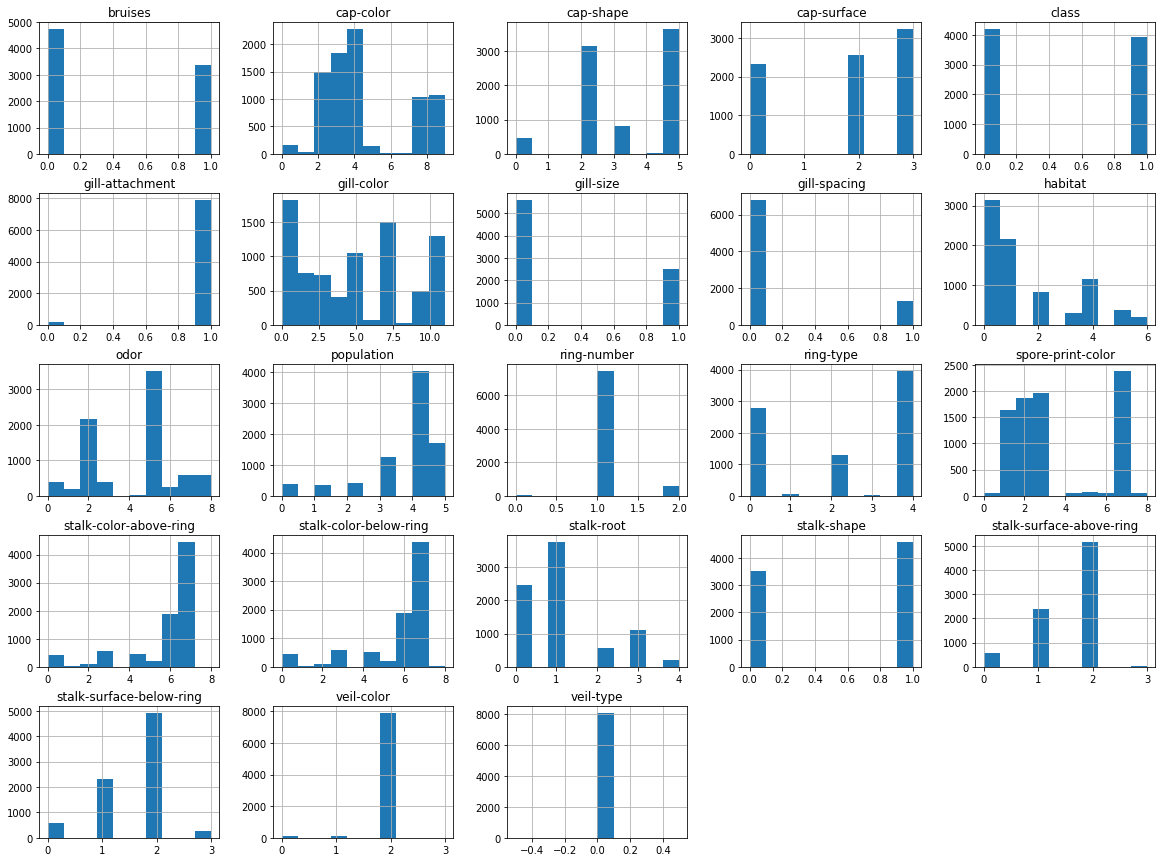

In [29]:
df.hist(figsize=(20,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025D0B760780>,
      dtype=object)

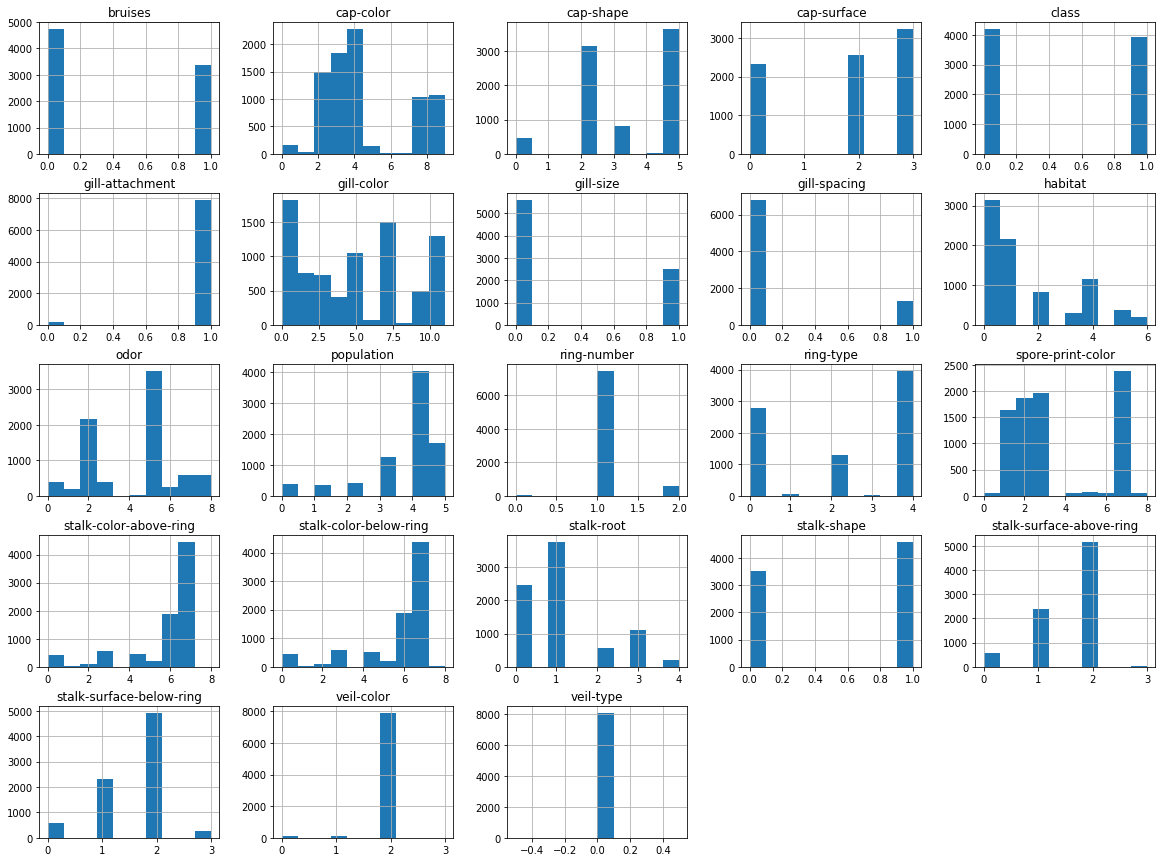

In [30]:
num_bins = 10
df.hist(bins=num_bins, figsize=(20,15))

In [ ]:
sns.pairplot(df, hue="class",diag_kind="kde")

In [ ]:
fig,axes=plt.subplots(figsize=(10,6))
sns.distplot(df['class'],kde=False,bins=50)

In [ ]:
sns.jointplot(x='gill-size', y='class', data=df, kind='hex', color='red', size=8)

In [ ]:
plt.plot(df)

In [ ]:
sns.FacetGrid(df, hue="class", size=5).map(plt.scatter, "gill-size", "gill-color").add_legend()

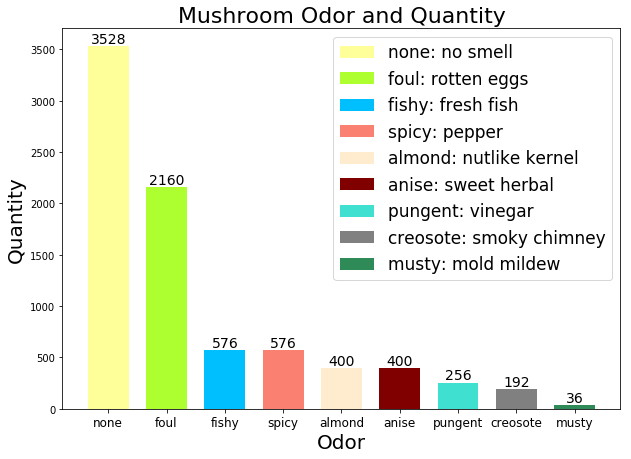

In [12]:
#Auto-labels the number of mushrooms for each bar color.
def autolabel(rects,fontsize=14):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,'%d' % int(height),
                ha='center', va='bottom',fontsize=fontsize)

#Obtain total number of mushrooms for each 'odor' (Entire DataFrame)
odors = df['odor'].value_counts()
odor_height = odors.values.tolist() #Provides numerical values
odor_labels = odors.axes[0].tolist() #Converts index labels object to list

#=====PLOT Preparations and Plotting====#
width = 0.7 
ind = np.arange(9)  # the x locations for the groups
colors = ['#FFFF99','#ADFF2F','#00BFFF','#FA8072','#FFEBCD','#800000','#40E0D0','#808080','#2E8B57']

fig, ax = plt.subplots(figsize=(10,7))
odor_bars = ax.bar(ind, odor_height , width, color=colors)

#Add some text for labels, title and axes ticks
ax.set_xlabel("Odor",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Mushroom Odor and Quantity',fontsize=22)
ax.set_xticks(ind) #Positioning on the x axis
ax.set_xticklabels(('none', 'foul','fishy','spicy','almond','anise','pungent','creosote','musty'),
                  fontsize = 12)
ax.legend(odor_bars, ['none: no smell','foul: rotten eggs', 'fishy: fresh fish','spicy: pepper',
                      'almond: nutlike kernel', 'anise: sweet herbal', 'pungent: vinegar',
                     'creosote: smoky chimney', 'musty: mold mildew'],fontsize=17)
autolabel(odor_bars)        
plt.show()

In [24]:
df_without_encode= pd.read_csv("data/mushrooms.csv")

In [1]:
# !pip install hypertools
import hypertools as hyp 

class_labels = df.pop('class')
fig, ax, data, _ = hyp.plot(df,'.')

ModuleNotFoundError: No module named 'hypertools'

In [9]:
X = df.drop("class", axis = 1)
y = df["class"]

for col in X.columns:
    print('\n*', col, '*')
    print(X[col].value_counts())


* cap-shape *
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

* cap-surface *
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64

* cap-color *
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
Name: cap-color, dtype: int64

* bruises *
f    4748
t    3376
Name: bruises, dtype: int64

* odor *
n    3528
f    2160
s     576
y     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64

* gill-attachment *
f    7914
a     210
Name: gill-attachment, dtype: int64

* gill-spacing *
c    6812
w    1312
Name: gill-spacing, dtype: int64

* gill-size *
b    5612
n    2512
Name: gill-size, dtype: int64

* gill-color *
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64

* stalk-shape *
t    4608
e    3516
Name: stalk-shape, dtype: int64

* stalk-root *
b    3776
